In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from misc import *
from scipy.signal import stft, blackman, hann

datapath = './../../audio/reduzidas'

In [2]:
audio_map = {audiofile:read_audio(os.path.join(datapath, audiofile)) for audiofile in os.listdir(datapath)}

In [3]:
wlen = 512
win = hann(wlen)
nfft = 1024

spec_map = {audioname: stft(audio, fs, win, wlen, wlen/2, nfft) 
            for (audioname, (fs, audio)) in audio_map.items()}

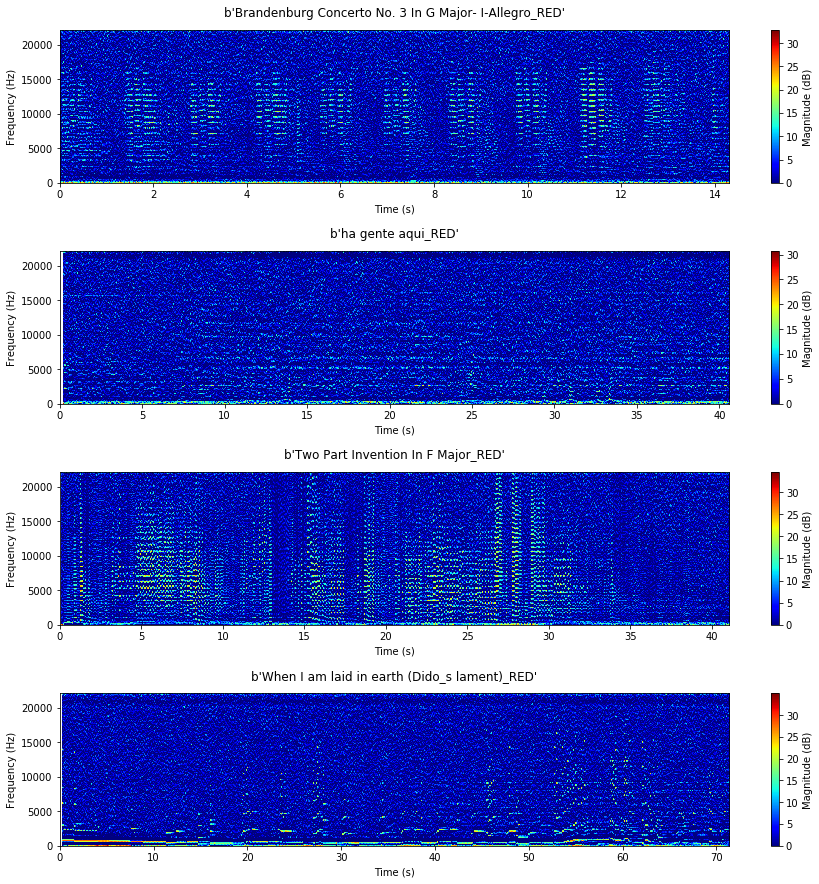

In [8]:
fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(15,15))
plt.subplots_adjust(hspace=0.45)
for (audio_name, (f, t, Sxx)), ax in zip(spec_map.items(), axes.flat): 
    power = processSpec(Sxx, win, wlen, 0.2)
    plot_spec(power, f, t, audio_name, ax)
    
